In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# combine = [train, test]
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print( train.columns )
print( test.columns )         # no columns --> 'Survived'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
# meta data
print( train.info() )
print('*' * 50)
print( test.info() )
# Age & Cabin & Embarked not completing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [6]:
train.describe()    # basic statistics numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.nunique()
train.describe(include='O')   # 'O' --> Object 只顯示 Object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mallet, Mr. Albert",male,1601,B96 B98,S
freq,1,577,7,4,644


## Categorical/Discretely valued VS [Survived]
查看(分類型/離散型數據)與(生存率)的重要性 

In [8]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(['Survived'], ascending=False)
# as_index=False --> SQL-Style

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(['Survived'], ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
# number of siblings on board ,sibling:兄弟姊妹
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(['Survived'], ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
# Parch : Parents & Child
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(['Survived'], ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(['Survived'], ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


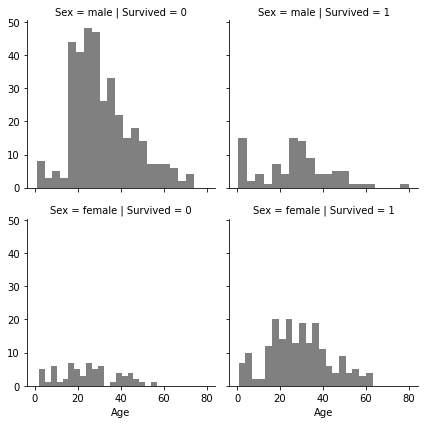

In [13]:
import seaborn as sns
grid = sns.FacetGrid(train, col='Survived', row='Sex')
grid.map(plt.hist, 'Age', bins=20, color='gray')
plt.show()

大多男性沒有生存

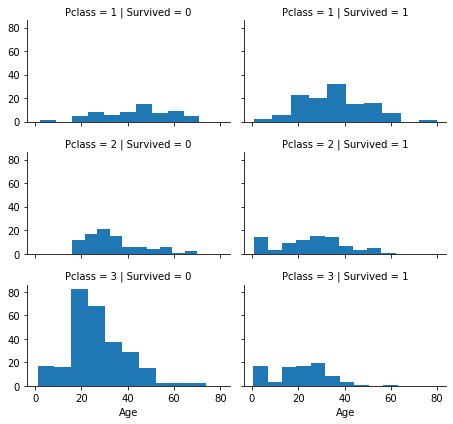

In [14]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2, aspect=1.6) # aspect:長寬比
grid.map(plt.hist, 'Age')
plt.show()

## Pclass3的人大多沒有存活

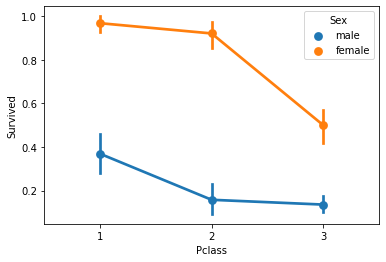

In [15]:
sns.pointplot(data=train, x='Pclass', y='Survived', hue='Sex')

F:\conda\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
F:\conda\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


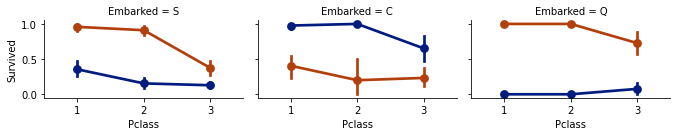

In [16]:
grid = sns.FacetGrid(train, col='Embarked',height=2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived',"Sex", palette='dark')
#grid.add_legend()
plt.show()

In [17]:
# 從名子抓取稱謂
train['Title'] = train['Name'].str.extract( '([A-Za-z]+)\.' , expand=False)
test['Title'] = test['Name'].str.extract( '([A-Za-z]+)\.' , expand=False)

train['Title'].value_counts()
pd.crosstab(index=train['Title'], columns=train['Sex'], margins=True).sort_values('All', ascending=False)

Sex,female,male,All
Title,,,
All,314,577,891
Mr,0,517,517
Miss,182,0,182
Mrs,125,0,125
Master,0,40,40
Dr,1,6,7
Rev,0,6,6
Major,0,2,2
Col,0,2,2


In [18]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].replace('Rev', 'Mr')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col', 'Mlle', 'Don', 'Jonkheer', 'Lady', 'Mme', \
                 'Countess', 'Ms', 'Sir', 'Capt'], 'Other')

train[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values('Survived', ascending=False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.697802
0,Master,0.575000
4,Other,0.571429
2,Mr,0.154876


In [19]:
# train['AgeBand'] = pd.cut(train['Age'], 5)
# train[['AgeBand', 'Survived']].groupby(['AgeBand']\
#             , as_index=False).mean().sort_values('AgeBand')

In [20]:
# ########### very hard ###########
# for dataset in [train, test]:
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ (dataset['Age'] > 64) , 'Age'] = 4
    
# # train['Age'].values

In [21]:
# Title  :   Age
# Maste -->  0
# Miss  -->  1
# Mr    -->  1
# Mrs   -->  1
# Other -->  2
# for dataset in [train, test]:
#     Age_NaN_index = dataset.loc[ dataset['Age'].isnull(), 'Age'].index
#     Age_Title_map = dataset.loc[Age_NaN_index, 'Title']
#     Age_Title_map = \
#         Age_Title_map.map( { 'Master':0, 'Miss':1, 'Mr':1, 'Mrs':1, 'Other':2 } )
#     dataset.loc[Age_NaN_index, 'Age'] = Age_Title_map

In [22]:
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map( {'male':1, 'female':0} )

In [23]:
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].map( {'Q':1, 'S':2, 'C':3} )

In [24]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].map( {'Mrs':0, 'Miss':1, 'Mr':2, 'Master':3, 'Other':4} )

In [25]:
# ###############  why doesn't it work?  # ###############  
# for dataset in [train, test]:
#     dataset = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
#     print(id(dataset))

In [26]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [27]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2.0,2
1,1,1,0,38.0,1,0,71.2833,3.0,0
2,1,3,0,26.0,0,0,7.9250,2.0,1
3,1,1,0,35.0,1,0,53.1000,2.0,0
4,0,3,1,35.0,0,0,8.0500,2.0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2.0,2
887,1,1,0,19.0,0,0,30.0000,2.0,1
888,0,3,0,NaN,1,2,23.4500,2.0,1
889,1,1,1,26.0,0,0,30.0000,3.0,2


In [28]:
# for c in train.columns:
#     train[c] = train[c].astype('int')
# for c in test.columns:
#     test[c] = test[c].astype('int')
# train.info()
# test.info()

In [29]:
import statsmodels.imputation.mice as mice
imp_train_mice = mice.MICEData(train)
train_mice = imp_train_mice.data
imp_test_mice = mice.MICEData(test)
test_mice = imp_test_mice.data

In [30]:
print(train_mice.info)

<bound method DataFrame.info of      Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0           0       3    1  22.0      1      0   7.2500       2.0      2
1           1       1    0  38.0      1      0  71.2833       3.0      0
2           1       3    0  26.0      0      0   7.9250       2.0      1
3           1       1    0  35.0      1      0  53.1000       2.0      0
4           0       3    1  35.0      0      0   8.0500       2.0      2
..        ...     ...  ...   ...    ...    ...      ...       ...    ...
886         0       2    1  27.0      0      0  13.0000       2.0      2
887         1       1    0  19.0      0      0  30.0000       2.0      1
888         0       3    0  30.0      1      2  23.4500       2.0      1
889         1       1    1  26.0      0      0  30.0000       3.0      2
890         0       3    1  32.0      0      0   7.7500       1.0      2

[891 rows x 9 columns]>


In [31]:
X_train = train_mice.iloc[:, 1:]
Y_train = train_mice.iloc[:, 0]

In [32]:
from sklearn.preprocessing import Normalizer
Normalizer = Normalizer()
X_train = Normalizer.fit_transform(X_train)
X_test = Normalizer.fit_transform(test_mice)

In [33]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
randomfroest_score = round(RFC.score(X_train, Y_train) * 100, 2)
randomfroest_score

98.09

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
KNNC.fit(X_train, Y_train)
Y_pred = KNNC.predict(X_test)
KNNC_score = round( KNNC.score(X_train, Y_train) * 100, 2 )
KNNC_score

82.83

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators=200)
ETC.fit(X_train, Y_train)
Y_pred = ETC.predict(X_test)
extratree_score = round( ETC.score(X_train, Y_train) * 100, 2 )
extratree_score


98.09